<a href="https://colab.research.google.com/github/23151009-lab/Assignment-2/blob/main/truonghiendat_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow



In [2]:
uploaded = files.upload()


Saving Assignment2.png to Assignment2.png


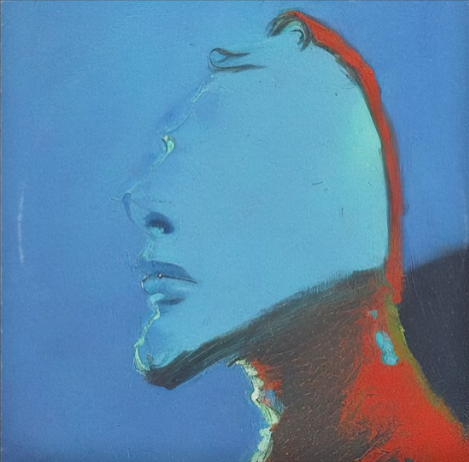

In [3]:
img = cv.imread('Assignment2.png')
cv2_imshow(img)

## **# histogram_equalization**

In [4]:
# to run in google colab
import sys

if "google.colab" in sys.modules:
    import subprocess

    subprocess.call("apt-get install subversion".split())
    subprocess.call(
        "svn export https://github.com/YoniChechik/AI_is_Math/trunk/c_02a_basic_image_processing/Unequalized_Hawkes_Bay_NZ.jpg".split()
    )

In [5]:
figsize = (10, 10)

First, read the image as grayscale

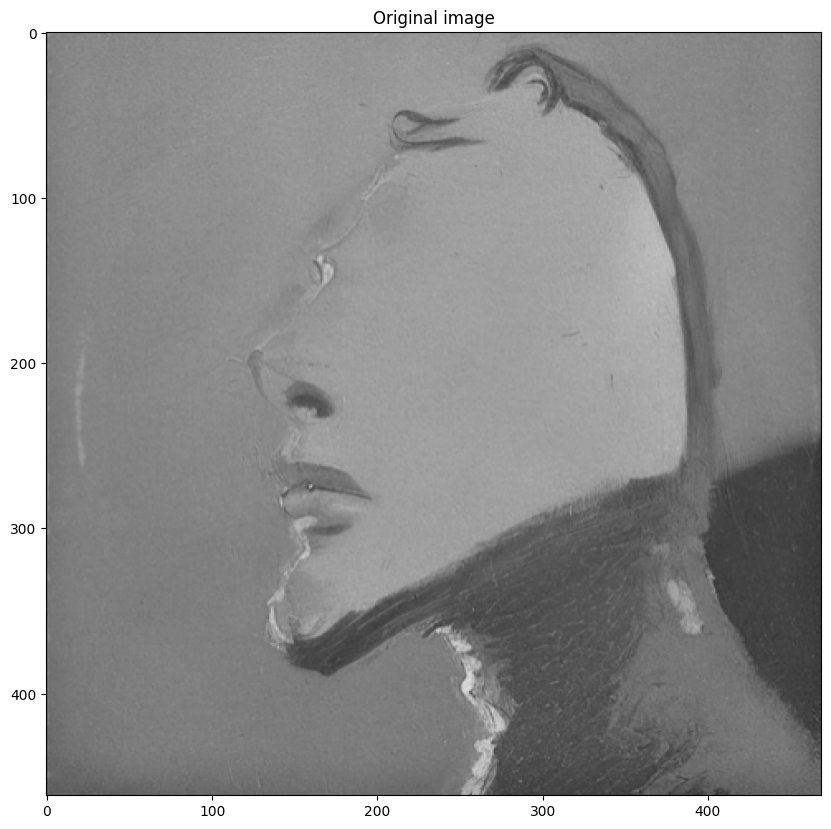

In [7]:
# read as grayscale
I = cv.imread("Assignment2.png", 0)

plt.figure(figsize=figsize)
plt.imshow(I, cmap="gray", vmin=0, vmax=255)
plt.title("Original image")
plt.show()

Let's start by calculating and showing the original histogram

In [8]:
bins_edges_min_max = [0, 256]
num_bins = 256
bin_count, bins_edges = np.histogram(I, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

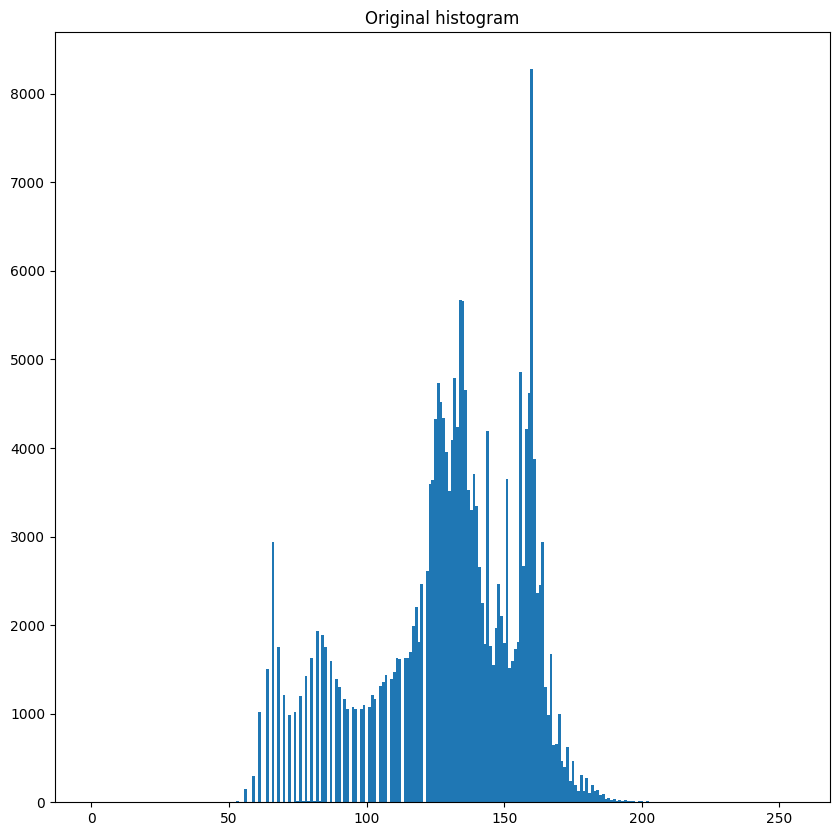

In [9]:
def draw_hist(x_axis, input):
    fig, ax = plt.subplots(figsize=figsize)
    # why not using plt.hist? because we want to plot also some derivations of this hist, so this is easier
    plt.bar(x_axis, input, width=input.shape[0] / (x_axis[-1] - x_axis[0] + 1))
    return fig, ax


draw_hist(bins_start, bin_count)
plt.title("Original histogram")
plt.show()


Normalize the histogram to gat a discrete PDF

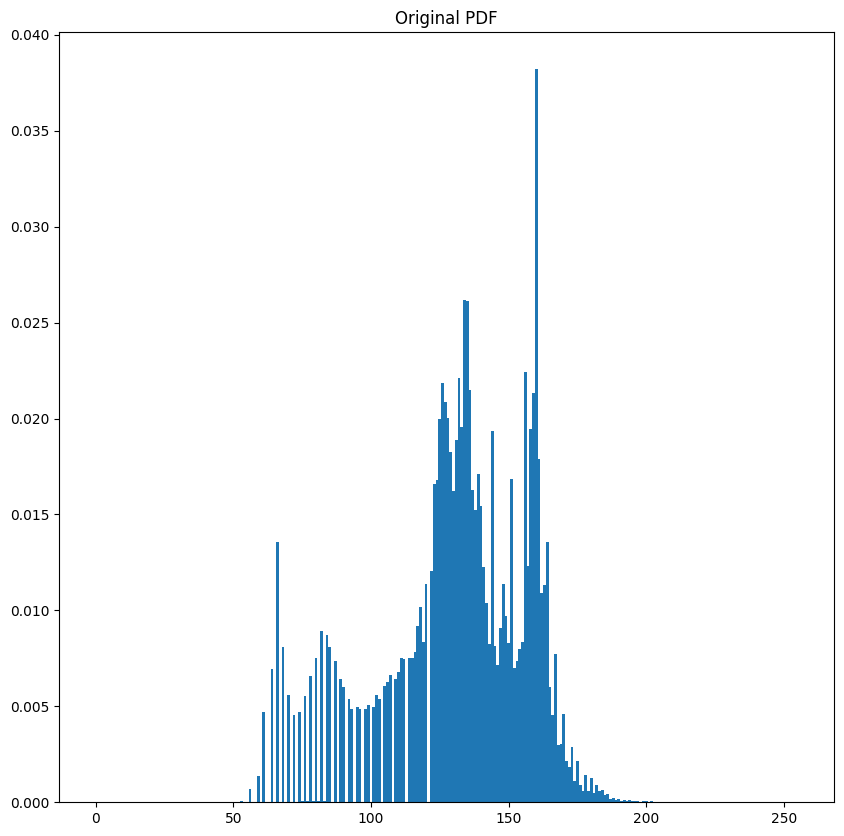

In [10]:
pdf = bin_count / np.sum(bin_count)

draw_hist(bins_start, pdf)
plt.title("Original PDF")
plt.show()


Get the CDF by calculating the cumulative sum of the pdf data

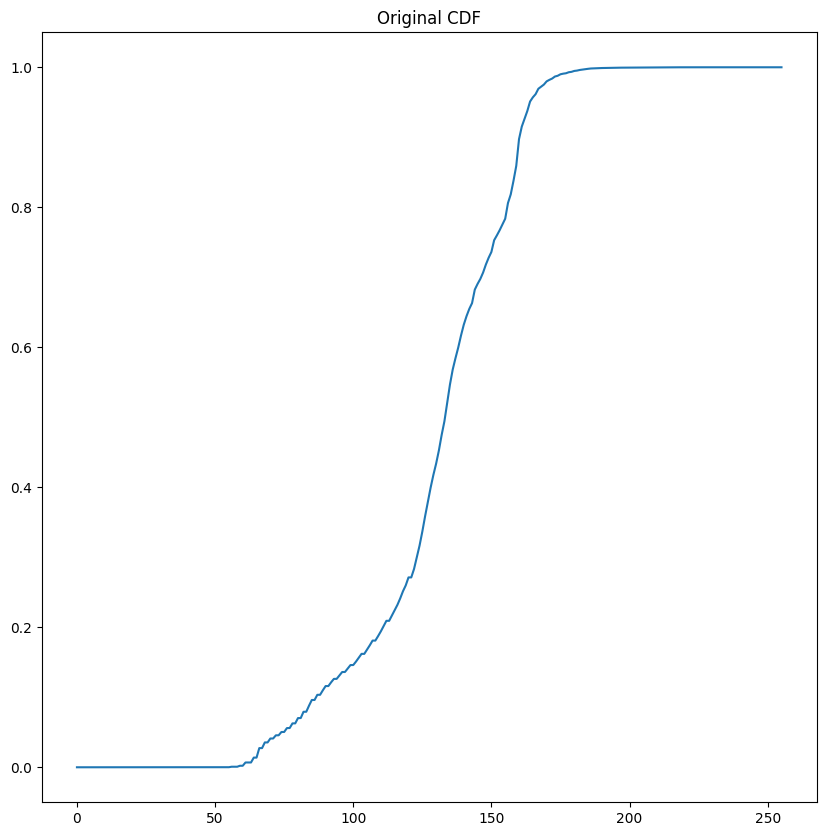

In [11]:
cdf = np.cumsum(pdf)

plt.figure(figsize=figsize)
plt.plot(cdf)
plt.title("Original CDF")
plt.show()

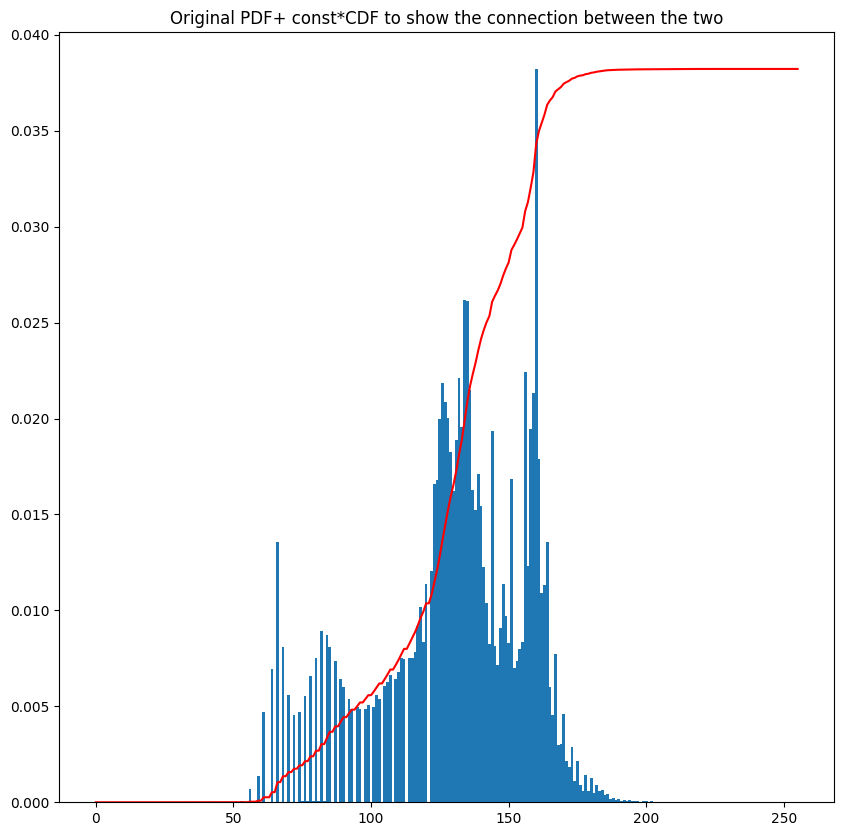

In [12]:
fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("Original PDF+ const*CDF to show the connection between the two")
plt.show()

The final step is to un-normalize the CDF to become the equalization function

In [13]:
f_eq = np.round(cdf * 255).astype(int)

f_eq

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   1,   1,   2,   2,   2,   4,
         4,   7,   7,   9,   9,  10,  10,  12,  12,  13,  13,  14,  14,
        16,  16,  18,  18,  20,  20,  22,  25,  25,  26,  26,  28,  30,
        30,  31,  32,  32,  33,  35,  35,  36,  37,  37,  39,  40,  41,
        41,  43,  44,  46,  46,  48,  50,  51,  53,  53,  55,  57,  59,
        62,  64,  66,  69,  69,  72,  76,  81,  86,  91,  97, 102, 106,
       111, 115, 121, 126, 133, 139, 145, 149, 153, 157, 161, 164, 167,
       169, 174, 176, 178, 180, 183, 186, 188, 192, 194, 196, 198, 200,
       206, 209, 214, 219, 229, 233, 236, 239, 243, 244, 245, 247, 248,
       249, 250, 250, 251, 252, 252, 252, 253, 253, 253, 253, 25

Use the equalization function to get the equalized image

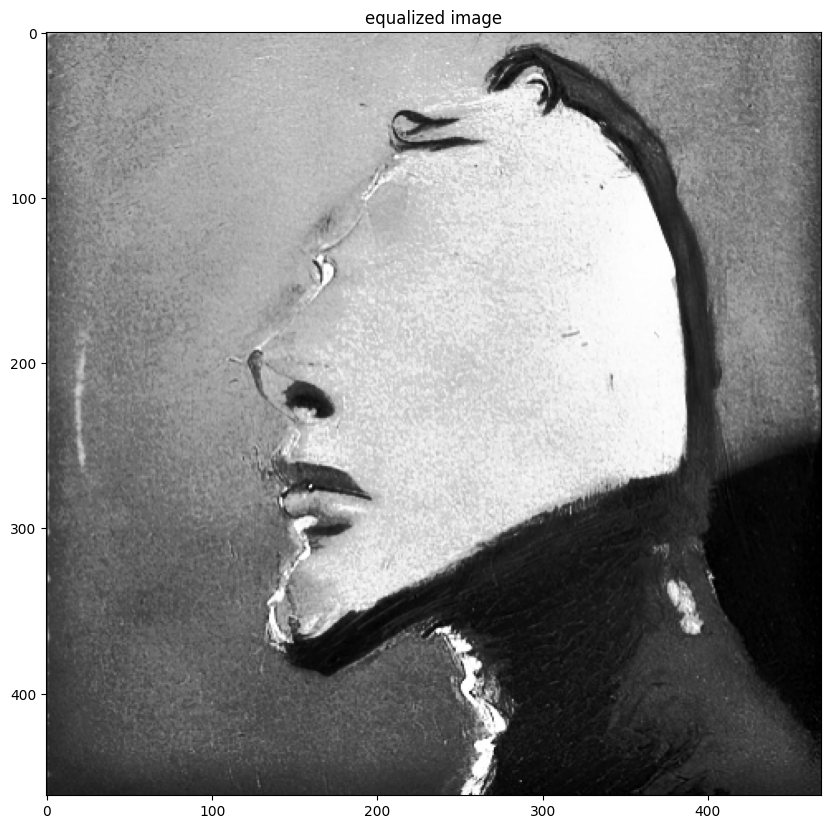

In [14]:
I_eq = f_eq[I]

plt.figure(figsize=figsize)
plt.imshow(I_eq, cmap="gray", vmin=0, vmax=255)
plt.title("equalized image")
plt.show()

Plot the equalized histogram, PDF and CDF

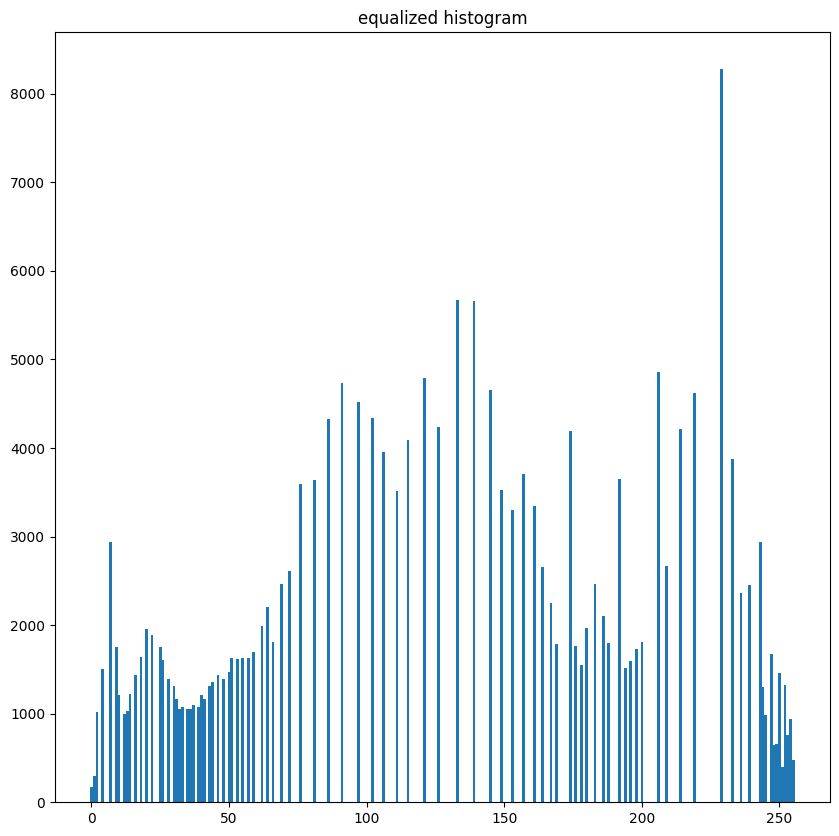

In [15]:
bin_count, bins_edges = np.histogram(I_eq, num_bins, bins_edges_min_max)
bins_start = bins_edges[:-1]

draw_hist(bins_start, bin_count)
plt.title("equalized histogram")
plt.show()

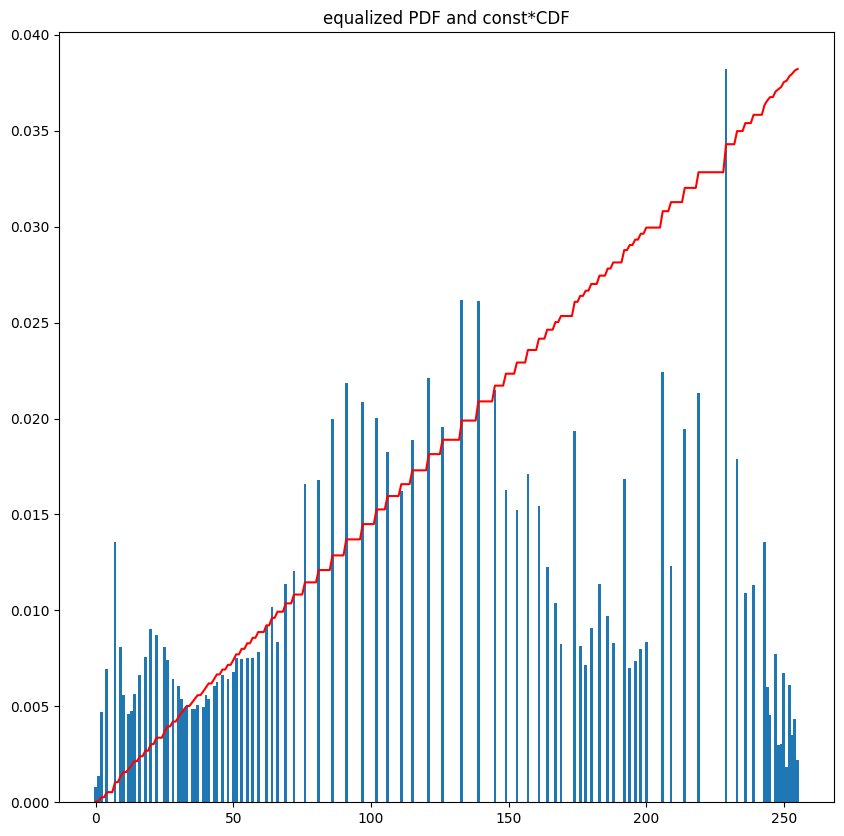

In [16]:
pdf = bin_count / np.sum(bin_count)
cdf = np.cumsum(pdf)

fig, ax = draw_hist(bins_start, pdf)
ax.plot(cdf * np.max(pdf), "r")
plt.title("equalized PDF and const*CDF")
plt.show()

cv2 histogram equalization function

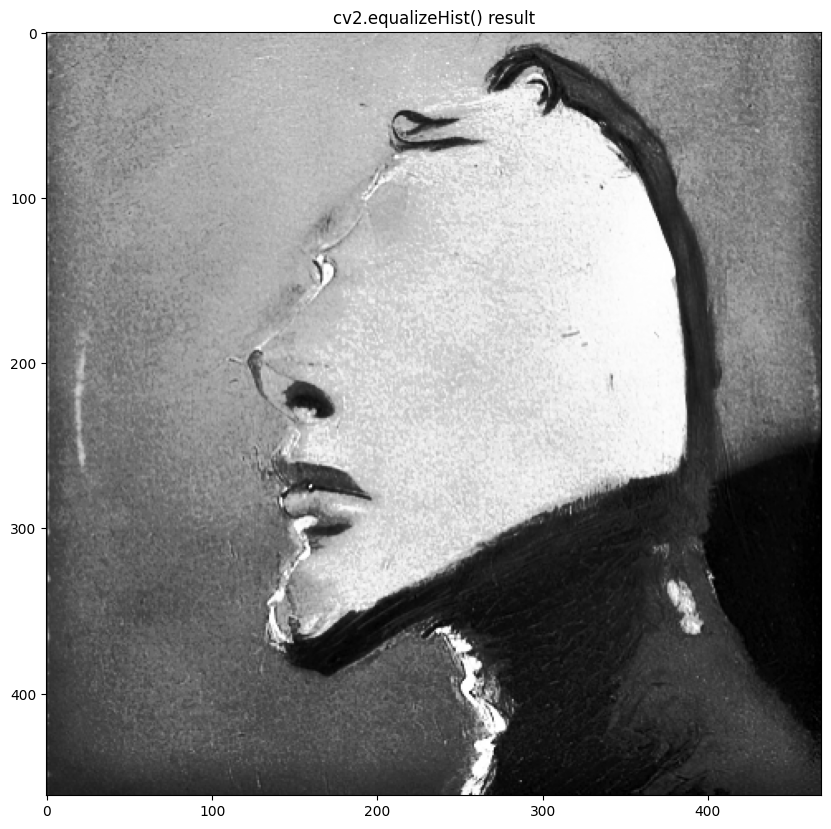

In [18]:
Img_eq_cv2 = cv.equalizeHist(I)

plt.figure(figsize=figsize)
plt.imshow(Img_eq_cv2, cmap="gray", vmin=0, vmax=255)
plt.title("cv2.equalizeHist() result")
plt.show()

In [ ]:
ADAPTIVE HISTOGARM EQUALIZATION- CLAHE


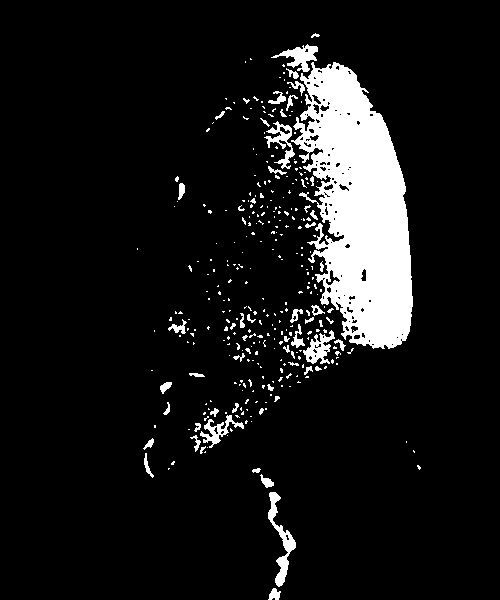

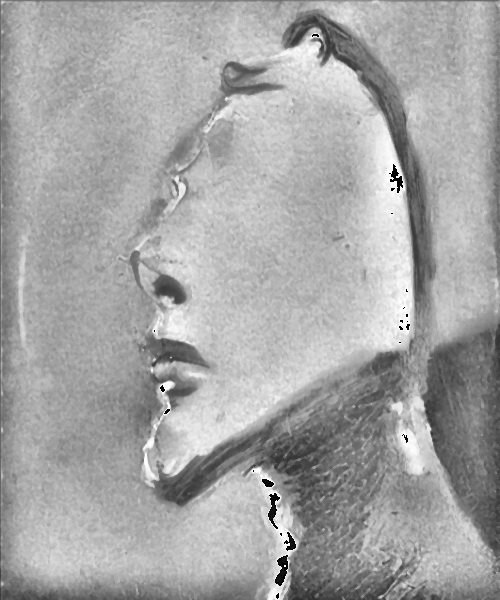

In [23]:
import cv2
import numpy as np

# Reading the image from the present directory
image = cv.imread("Assignment2.png")
# Resizing the image for compatibility
image = cv.resize(image, (500, 600))

# The initial processing of the image
image = cv2.medianBlur(image, 3)
image_bw = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# The declaration of CLAHE
# clipLimit -> Threshold for contrast limiting
clahe = cv.createCLAHE(clipLimit=5)
final_img = clahe.apply(image_bw) + 30

# Ordinary thresholding the same image
_, ordinary_img = cv.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)

# Showing the two images
cv2_imshow(ordinary_img)
cv2_imshow(final_img)

**HISTOGRAM MATCHING**

In [24]:
uploaded = files.upload()

Saving assignment2_match.png to assignment2_match.png


In [25]:
from skimage.exposure import match_histograms
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

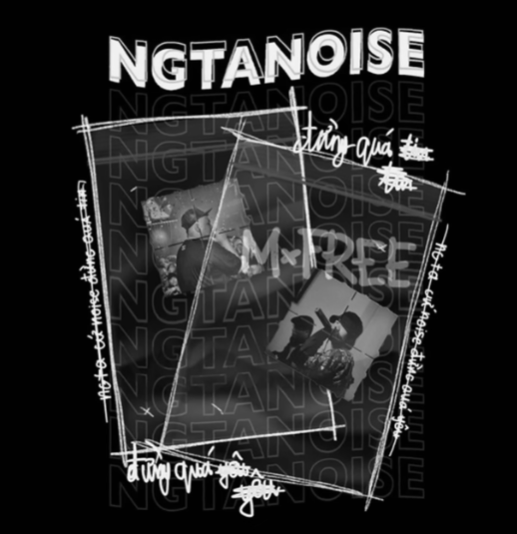

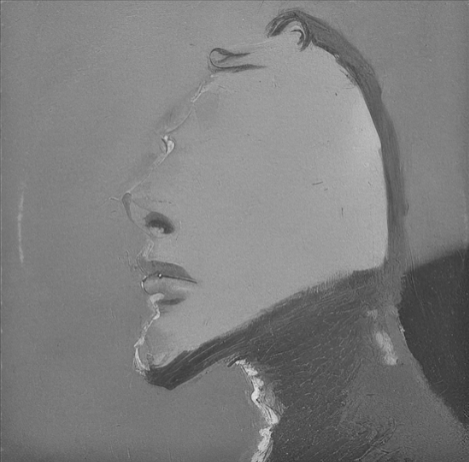

In [27]:
img = cv.imread("assignment2_mimic.png")
source = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

img_t = cv.imread("Assignment2.png")
target = cv.cvtColor(img_t, cv.COLOR_BGR2GRAY)

cv2_imshow(source)
cv2_imshow(target)

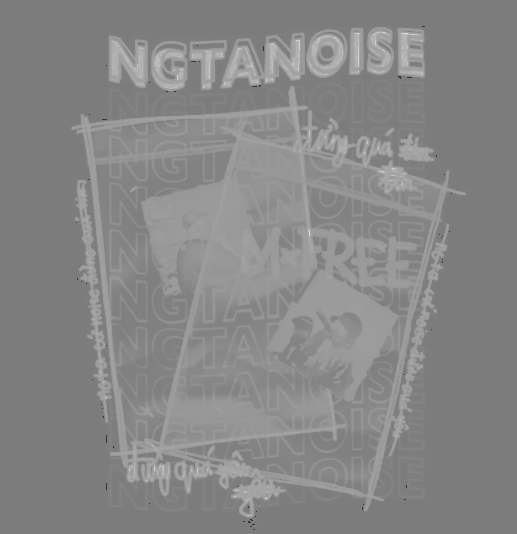

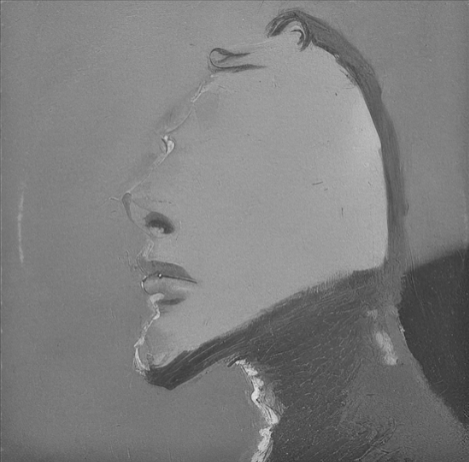

In [31]:
matched = match_histograms(source, target, channel_axis=None)
cv2_imshow(matched)
cv2_imshow(target)